In [19]:
using LinearAlgebra
using Plots
using DataFrames
using CSV

In [20]:
cart40_ts = 1:25
cart10_ts = 1:7

colors = theme_palette(:auto)
DUMP_DIR = joinpath(@__DIR__, "..", "dump", "cartpole-scale")
;

In [28]:
function loadDataFrame(mode, opts)
    if mode == :cart10; mstr = "cart10"
    elseif mode == :cart40; mstr = "cart40"
    else error("Unsupported mode: $(mode)")
    end
    
    if opts == :deepsdp; ostr = "deepsdp"
    elseif opts == :deepsdp_dual; ostr = "deepsdp__dual"
    elseif opts == :chordal; ostr = "chordal__single_decomp"
    elseif opts == :chordal2; ostr = "chordal__double_decomp"
    elseif opts == :chordal2_dual; ostr = "chordal__dual__double_decomp"
    else error("Unsupported method: $(method)") 
    end
    
    filepath = joinpath(DUMP_DIR, "$(mstr)_$(ostr).csv")
    return CSV.File(filepath)
end

cart10_deepsdp_df = loadDataFrame(:cart10, :deepsdp)
cart10_deepsdp_dual_df = loadDataFrame(:cart10, :deepsdp_dual)
cart10_chordal_df = loadDataFrame(:cart10, :chordal)
cart10_chordal2_df = loadDataFrame(:cart10, :chordal2)

cart40_deepsdp_dual_df = loadDataFrame(:cart40, :deepsdp_dual)
cart40_chordal2_df = loadDataFrame(:cart40, :chordal2)
cart40_chordal2_dual_df = loadDataFrame(:cart40, :chordal2_dual)
;

In [29]:
# [cart10_deepsdp_df[:obj_val] cart10_chordal2_df[:obj_val]]

In [40]:
# dfs are ordered by t
function plotDataFrames(batch; kwargs...)
    marker_size = 6
    alpha = 0.6
    plt = plot()
    for (df, label, color) in batch
        ts = df[:t]
        num_ts = length(ts)
        plot!(plt, 1:num_ts, df.total_secs,
            color = color,
            marker = (:circle, marker_size),
            alpha = alpha,
            label = label)
    end
    plt = plot!(plt; kwargs...)
    return plt
end

plotDataFrames (generic function with 1 method)

plotDataFrames (generic function with 1 method)

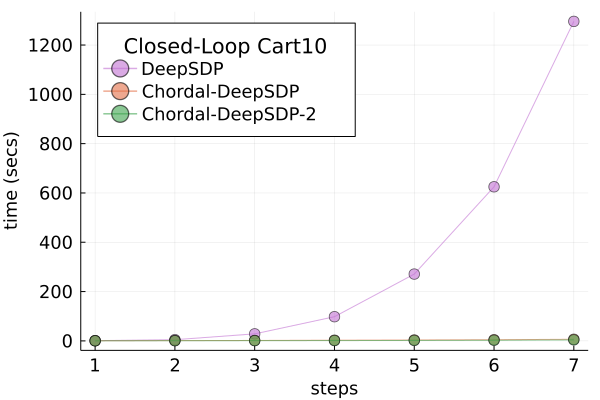

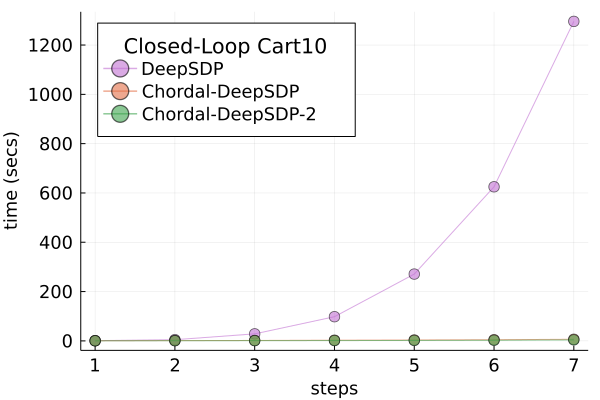

In [41]:
batch = [(cart10_deepsdp_df, "DeepSDP", colors[4]),
         (cart10_chordal_df, "Chordal-DeepSDP", colors[2]),
         (cart10_chordal2_df, "Chordal-DeepSDP-2", colors[3])]

fs = 12
plt = plotDataFrames(batch;
    legendtitle = "Closed-Loop Cart10",
    xlabel = "steps",
    ylabel = "time (secs)",
    legend = :topleft,
    xlabelfontsize = fs, xtickfontsize = fs,
    ylabelfontsize = fs, ytickfontsize = fs,
    legendfontsize = fs, legendtitlefontsize = fs+2,
)

savefig(plt, joinpath(DUMP_DIR, "scale-deep-vs-chordal-vs-chordal2.png"))

plt

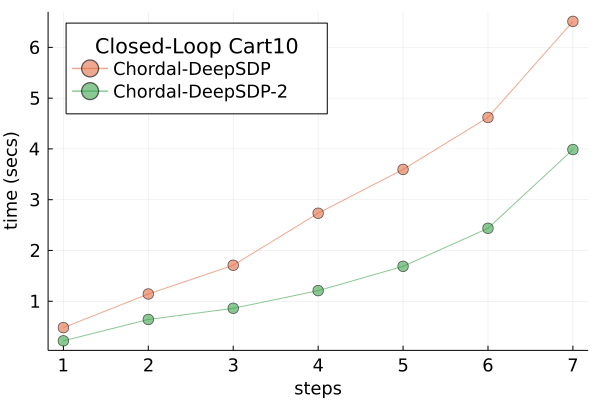

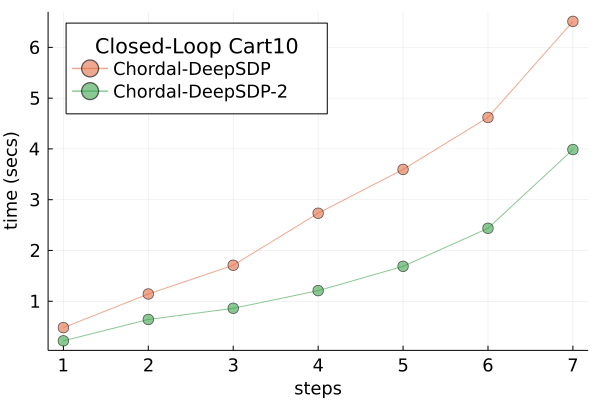

In [42]:
batch = [
         # (cart10_deepsdp_df, "DeepSDP", colors[4]),
         (cart10_chordal_df, "Chordal-DeepSDP", colors[2]),
         (cart10_chordal2_df, "Chordal-DeepSDP-2", colors[3])]

fs = 12
plt = plotDataFrames(batch;
    legendtitle = "Closed-Loop Cart10",
    xlabel = "steps",
    ylabel = "time (secs)",
    legend = :topleft,
    xlabelfontsize = fs, xtickfontsize = fs,
    ylabelfontsize = fs, ytickfontsize = fs,
    legendfontsize = fs, legendtitlefontsize = fs+2,
)

savefig(plt, joinpath(DUMP_DIR, "scale-chordal-vs-chordal2.png"))

plt

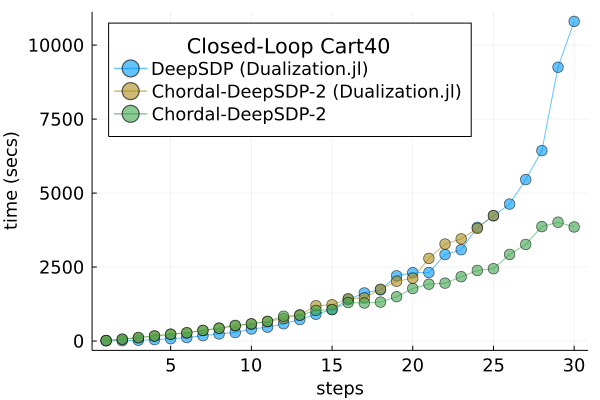

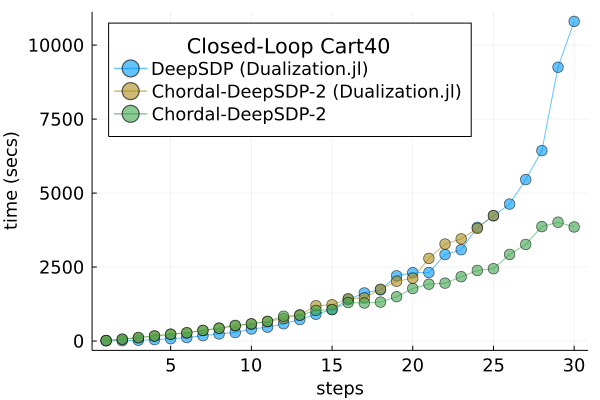

In [43]:
batch = [
    (cart40_deepsdp_dual_df, "DeepSDP (Dualization.jl)", colors[1]),
    (cart40_chordal2_dual_df, "Chordal-DeepSDP-2 (Dualization.jl)", colors[5]),
    (cart40_chordal2_df, "Chordal-DeepSDP-2", colors[3])
]

fs = 12
plt = plotDataFrames(batch;
    legendtitle = "Closed-Loop Cart40",
    xlabel = "steps",
    ylabel = "time (secs)",
    legend = :topleft,
    xlabelfontsize = fs, xtickfontsize = fs,
    ylabelfontsize = fs, ytickfontsize = fs,
    legendfontsize = fs, legendtitlefontsize = fs+2,
)

savefig(plt, joinpath(DUMP_DIR, "scale-deepdual-vs-chordal2.png"))

plt

In [44]:
[cart40_chordal2_df[:total_secs] cart40_deepsdp_dual_df[:total_secs]]

30×2 Matrix{Float64}:
   16.1114      7.52952
   65.3061      9.95859
  119.792      26.2009
  169.99       48.9978
  231.465      78.6392
  283.789     117.445
  360.898     182.562
  432.552     239.271
  529.982     287.378
  583.614     405.452
  662.715     467.813
  837.554     584.051
  870.334     726.269
    ⋮       
 1498.33     2204.49
 1775.47     2309.18
 1921.0      2313.88
 1956.9      2923.33
 2173.98     3085.44
 2385.91     3841.15
 2444.21     4233.62
 2927.5      4628.1
 3265.7      5456.54
 3867.37     6434.49
 4016.42     9254.06
 3855.27    10802.3

30×2 Matrix{Float64}:
   16.1114      7.52952
   65.3061      9.95859
  119.792      26.2009
  169.99       48.9978
  231.465      78.6392
  283.789     117.445
  360.898     182.562
  432.552     239.271
  529.982     287.378
  583.614     405.452
  662.715     467.813
  837.554     584.051
  870.334     726.269
    ⋮       
 1498.33     2204.49
 1775.47     2309.18
 1921.0      2313.88
 1956.9      2923.33
 2173.98     3085.44
 2385.91     3841.15
 2444.21     4233.62
 2927.5      4628.1
 3265.7      5456.54
 3867.37     6434.49
 4016.42     9254.06
 3855.27    10802.3